Here, we will examine data about male and female voices in order to develop a decision tree algorithm that will predict whether a voice with certain parameters is male or female. The data we are using  is from Kaggle and has 20 different variables along with the label, which is either male or female.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import sweetviz as sv
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [325]:
voices_df = pd.read_csv("voice.csv")

In [326]:
voices_df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


# EDA

In [327]:
voices_report = sv.analyze(voices_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [328]:
voices_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [331]:
visualizable_feature_names = voices_df.columns[0: -1]
num_visualizable_features = len(visualizable_feature_names)
labels = voices_df['label'].unique()

In [349]:
import plotly.graph_objects as go

fig_hist = []
for i, feature_name in enumerate(visualizable_feature_names):
    fig_hist.append(go.Figure())
    for label in labels:
        fig_hist[i].add_trace(go.Histogram(x=voices_df[voices_df["label"]==label][feature_name], name=label))
    fig_hist[i].update_layout(height=400, width=800, title_text=feature_name)
    fig_hist[i].update_layout(barmode='overlay')
    fig_hist[i].update_traces(opacity=0.5)
    fig_hist[i].show()

# Use columns with furthest male/female peaks from each other

In [334]:
#Based on the EDA it appears that the two features "meanfun" and "IQR" are the variables that best differentiate male and female voices
feature_cols = ['meanfun', 'IQR']
X = voices_df[feature_cols]
y = voices_df.label

Split the data into training and testing sets

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [336]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [337]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9600420609884333


In [338]:
from sklearn import tree
tree1 = tree.DecisionTreeClassifier(max_depth = 3)
tree1 = tree1.fit(X, y)

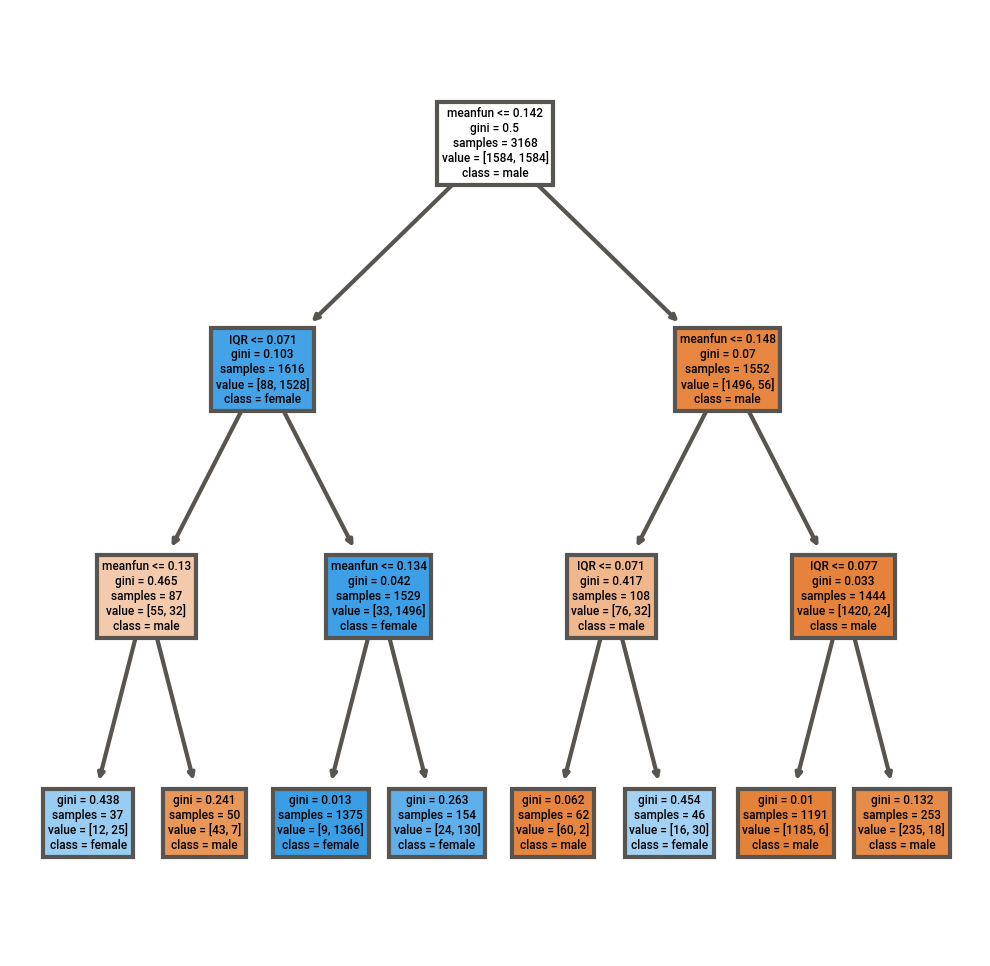

In [339]:
fn=['meanfun','IQR']
cn=['male', 'female']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree1,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('tree1.png')

In [340]:
sample_one_pred_tree1 = clf.predict([[0.07, 0.1]])
sample_two_pred_tree1 = clf.predict([[1.5, 1.5]])
print(f" TREE1 sample_one most likely belongs to a {sample_one_pred_tree1[0]}")
print(f" TREE1 sample_two most likely belongs to a {sample_two_pred_tree1[0]}")

 TREE1 sample_one most likely belongs to a male
 TREE1 sample_two most likely belongs to a female


In [341]:
tree1.score(X, y)

0.9703282828282829

In [342]:
tree2 = tree.DecisionTreeClassifier(max_depth = 3)
tree2 = tree2.fit(X_train, y_train)

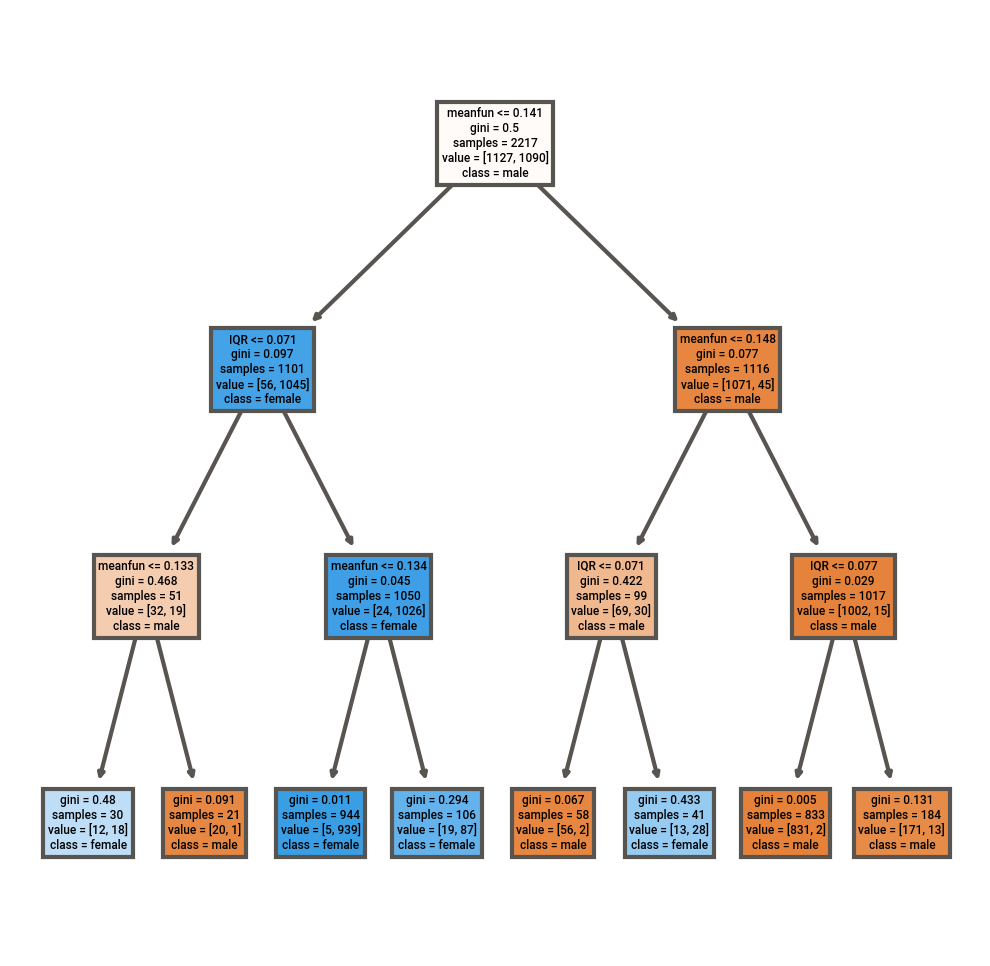

In [343]:
fn=['meanfun','IQR']
cn=['male', 'female']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree2,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('tree2.png')

In [344]:
sample_three_pred_tree2 = tree1.predict([[0.03, 0.3]])
sample_four_pred_tree2 = tree1.predict([[0.16, 1.6]])
print(f" TREE1 sample_two most likely belongs to a {sample_three_pred_tree2[0]}")
print(f" TREE1 sample_two most likely belongs to a {sample_four_pred_tree2[0]}")

 TREE1 sample_two most likely belongs to a male
 TREE1 sample_two most likely belongs to a female


In [345]:
tree2.score(X_train, y_train)

0.9697789806044204

In [346]:
cm1 = confusion_matrix(y_test, y_pred)
ac1 = accuracy_score(y_test, y_pred)
cr1 = classification_report(y_pred, y_test)

print(cm1)
print(ac1)
print(cr1)

[[444  13]
 [ 25 469]]
0.9600420609884333
              precision    recall  f1-score   support

      female       0.97      0.95      0.96       469
        male       0.95      0.97      0.96       482

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951

